## OpenCV와 dlib 라이브러리를 이용한 스티커 앱 기초 만들기

In [35]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 1. Object detection: dlib의 face detector를 이용한 얼굴 인식

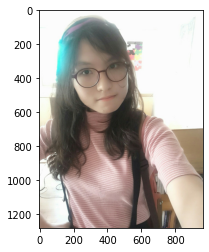

In [36]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()    # 이미지 처리용 img_show와 원본 img_bgr을 분리
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)    # img_show를 rgb로 변환
plt.imshow(img_show)
plt.show()

* OpenCV는 BGR(Blue, Green, Red) 이미지 채널을 사용하므로, matplotlib, dlib과 함께 사용할 때는 RGB(Red, Green, Blue)로 변환을 거쳐야 한다.

In [26]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_show, 1)
print(dlib_rects)
type(dlib_rects)

rectangles[[(161, 247) (546, 632)]]


_dlib_pybind11.rectangles

* dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 이용, 이미지에서 색상의 변화량을 벡터로 나타낸 다음 선형 분류기를 이용해 대상을 구분하는 방식을 취한다.
* 찾은 얼굴은 dlib.rectangle 객체의 배열로 반환된다. 사진에 n명의 얼굴이 등장하면 객체에 n개의 배열을 저장한다.
* 이를 print로 출력하면 인식한 얼굴 rectangle의 top-left 좌표와 bottom-right 좌표를 출력한다.

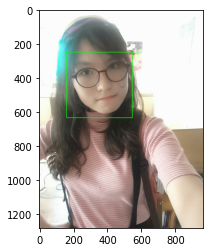

In [27]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()    # dlib_rectangle 객체가 포함하고 있는 함수 left(), top(), right(), bottom()으로 호출한 좌표값을 저장
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType = cv2.LINE_AA)    # img_show에 face detector가 찾은 rectangle 그리기

plt.imshow(img_show)
plt.show()

* 사진 위에 사각형 그리기: cv2.rectangle(이미지 파일, 시작점 좌표(좌측 상단), 종료점 좌표(우측 하단), color, thickness, lineType) 
  * color: blue = (255,0,0) / green = (0,255,0) / red = (0,0,255) / white = (255,255,255)  **※OpenCV 함수이므로 color는 Blue, Green, Red 순으로 지정**

### ※ 만약 사진에 찍힌 사람이 여럿이고, 얼굴 인식이 어려운 경우에는?

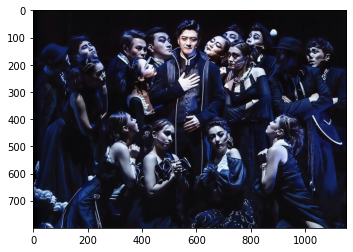

In [5]:
my_image_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.jpg'
img_bgr2 = cv2.imread(my_image_path2)
img_show2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show2)
plt.show()

* 어두운 배경, 다양한 각도, 작게 찍힌 얼굴 등이 함께 등장하는 사진으로 뮤지컬 <에드거 앨런 포>(2016년)의 공연 장면 사진을 가져왔다. 기괴한 분위기 연출을 위해 짙은 메이크업과 어두운 조명이 사용되었다.

rectangles[[(536, 88) (610, 163)], [(643, 437) (718, 511)], [(354, 106) (444, 196)], [(683, 136) (772, 226)], [(461, 428) (536, 503)]]


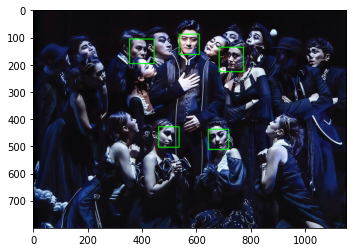

time : 0.8579647541046143


In [6]:
import time
start = time.time()

dlib_rects2 = detector_hog(img_show2, 1)
print(dlib_rects2)

for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom() 
    
    cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 2, lineType = cv2.LINE_AA)

plt.imshow(img_show2)
plt.show()

print("time :", time.time() - start)

* 빛을 받지 못하거나 측면으로 찍히는 등의 이유로 눈,코,입이 모두 찍히지 않은 경우에는 인식되지 않아 총 17명의 배우 중 5명만이 인식되었다.
* 해당 얼굴 인식에는 약 0.8초의 시간이 소요되었다.

rectangles[[(531, 85) (603, 157)], [(643, 436) (715, 508)], [(1019, 418) (1022, 421)], [(699, 141) (771, 213)], [(1016, 423) (1018, 426)], [(350, 112) (437, 198)], [(815, 58) (817, 60)]]


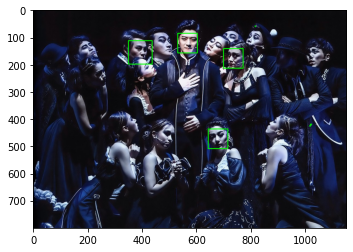

time : 152.92449045181274


In [7]:
img_show3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)    # 이미지 초기화

start = time.time()

dlib_rects3 = detector_hog(img_show3, 5)    # image pyramids의 수 증가
print(dlib_rects3)

for dlib_rect in dlib_rects3:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom() 
    
    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType = cv2.LINE_AA)

plt.imshow(img_show3)
plt.show()

print("time :", time.time() - start)

In [8]:
for dlib_rect in dlib_rects3:
    print(dlib_rect.width(), dlib_rect.height())

73 73
73 73
4 4
73 73
3 4
88 87
3 3


* 이미지 upsampling 방법을 통해 크기를 키운 image pyramid에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능하다고 알려져있다. 
* image pyramid를 5개로 늘려 재시도해본 결과, 총 7개의 얼굴을 인식하였으나, 그 중 3개는 얼굴이 아닌(width, height가 3~4 pixel인 옷 주름을 얼굴로 오인함) 의미없는 좌표인 것으로 나타났다. image pyramid가 1개일 때 인식한 얼굴을 인식하지 못하는 경우도 발생,실질적으로 4명의 얼굴을 인식한 셈이 되어 인식율은 오히려 떨어졌다.
* 소요시간 또한 152초로 지나치게 길어짐을 확인할 수 있었다. **Image pyramid 수를 늘리는 것이 반드시 정확한 검출을 보장하는 것은 아닌 셈이다.**

## 2. Face landmark localization: face detector가 찾은 bounding box에서 얼굴의 landmark 찾기

In [9]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)    # 모델 불러오기

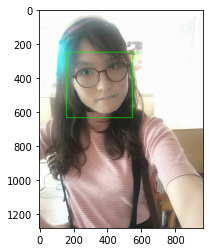

In [28]:
list_landmarks = []

for dlib_rect in dlib_rects:    # 얼굴 영역 박스마다 face landmark를 찾음(이번에는 한개 박스에서만 탐색)
    points = landmark_predictor(img_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)    # parts함수로 호출한 point들을 list_landmarks에 저장
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # 저장된 point들을 사진 위에 그리기

plt.imshow(img_show)
plt.show()

* dlib은 ibug300w 데이터셋을 사용하여, 얼굴의 68개 이목구비 위치를 찾는다.
* 이미 face detector를 통해 bounding box(dlib.rectangle)를 찾았기 때문에, keypoint를 찾는 알고리즘 중 top_down 알고리즘을 이용한다.

## 3. 얼굴에 적용할 수 있도록 스티커 크기 변환과 회전

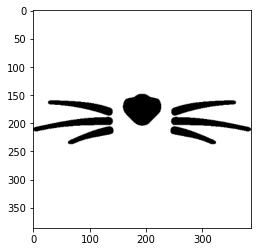

In [29]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)

w = dlib_rect.width()
h = dlib_rect.height()
img_sticker = cv2.resize(img_sticker, (w,h))

plt.imshow(img_sticker)
plt.show()

* 스티커 크기는 dlib.rectangle의 너비, 높이에 맞추었다.

14.1670555226312


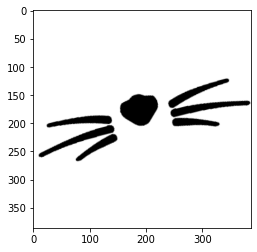

In [30]:
import math
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
angle = theta * 180 / math.pi
print(angle)

(c1, c2) = img_sticker.shape[:2]
center = (c1 // 2, c2 // 2)

rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rot_sticker = cv2.warpAffine(img_sticker, rot_matrix, (c1, c2), borderValue=(255,255,255))
plt.imshow(rot_sticker)
plt.show()

* 스티커를 회전시키기 위해서는 '회전 행렬'을 구해야 한다. 회전 행렬이란 행렬을 원점을 중심으로 회전시키는 행렬로, 선형 변환 행렬의 일종으로써 다음과 같이 표현할 수 있다. (여기서 중심은 원점이 아니라 스티커의 정중앙(center)이다.)

$$A_{rot} =
 \begin{pmatrix}
  \cos \theta & -sin \theta \\
  \sin \theta & cos \theta \\
 \end{pmatrix}$$
 

* 이때 스티커는 콧대를 기준으로 얼굴이 기울어진 각도만큼 회전되어야 하므로, dlib landmark의 27번, 30번을 이은 선의 각도를 arctan 함수를 이용해 구한다.

$$\tan \theta = (\frac{y_{30} - y_{27}}{x_{30} - x_{27}})$$

$$\theta = \arctan (\tan \theta)$$

* 여기서의 $\theta$는 호도법으로 표현된 숫자이므로, 60도법으로 변환한 각도 angle을 계산하였다.

$$angle = \theta \times \frac{180^\circ}{\pi}$$


* 회전 행렬을 구하는 함수: cv2.getRotationMatrix2D(중심, 회전각, 확대비율)
* 선형 변환 행렬을 이미지에 적용하는 함수: cv2.warpAffine(이미지, 회전행렬, 사이즈(row, columns), borderValue=(255,255,255)) 

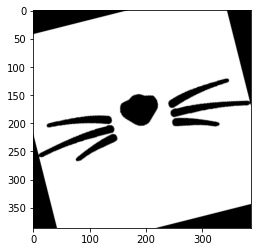

In [31]:
rot_sticker_wrong = cv2.warpAffine(img_sticker, rot_matrix, (c1, c2))
plt.imshow(rot_sticker_wrong)
plt.show()

* cv2.warpAffine에서 borderValue 인자를 white: (255,255,255)로 저장하지 않으면 default 값인 black: (0,0,0)이 지정되어 이미지에 적용하기 어려운 스티커가 된다.

## 4. 스티커 위치 조정과 적용

In [32]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]

refined_x = x - w // 2
refined_y = y - h //2
print('(x, y) : (%d, %d)' % (refined_x, refined_y))

(390, 459)
(x, y) : (197, 266)


* 스티커의 위치는 코의 중심점(dlib landmark 30번)으로 지정하였으며, 이에 맞춰 이미지 시작점 top-left 좌표를 설정한다.

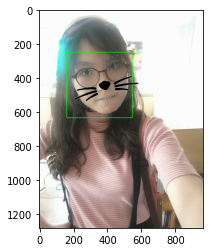

In [33]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], 
                        refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0],
         refined_x:refined_x + img_sticker.shape[1]] = np.where(rot_sticker==255, sticker_area, rot_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show()

* img값은 numpy의 ndarray type (행(y축), 열(x축), 이미지 채널)이므로, sticker_area도 y축, x축 순으로 지정해주어야 한다.
* np.where(조건, True, False) 함수: 조건식에 만족하는 pixel은 True로, 만족하지 않는 pixel은 False로 치환하는 함수이므로, rot_sticker가 255(하얀색)인 부분은 지정해 둔 sticker_area를, 하얀색이 아닌 부분은 rot_sticker를 출력한다.

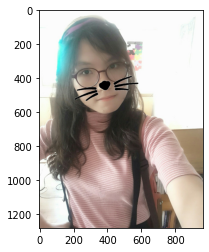

In [34]:
sticker_area = img_bgr[refined_y:refined_y + rot_sticker.shape[0], 
                       refined_x:refined_x + rot_sticker.shape[1]]
img_bgr[refined_y:refined_y + rot_sticker.shape[0], 
        refined_x:refined_x + rot_sticker.shape[1]] = np.where(rot_sticker==255,sticker_area,rot_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show() 

* 미리 분리해두었던 원본(img_bgr)에 스티커를 적용 후, RGB 채널로 변환하여 마무리한다.

## 회고

* 알게 된 점
  * image pyramid의 수를 늘린다는 것은 sliding window의 크기가 작아져 이동해가며 컴퓨터가 확인해야 하는 영역이 넓어지고, 이미지 전체를 확인하는데에 소요되는 시간이 오래 걸리게 되는 것을 의미한다. 오히려 작은 시야로 볼 수록 큰 형체를 알아보지 못하게 될 수도 있어 image pyramid를 크게 늘리는 것은 좋지 않다.
  
  * 이미지의 회전을 위해서는 각 pixel에 회전변환을 적용해야 한다. OpenCV는 회전행렬을 구하는 메서드와 선형 변환을 적용하는 메서드를 제공하고 있다. 확대 변환이나 대칭 변환도 이와 같은 선형 변환으로 이루어질 것을 짐작할 수 있다.


* 궁금한 점 
  * 공공장소 출입 시에 보게 되는 열화상 카메라 등을 보면 마스크를 써서 코에서 턱까지가 가려져있는 얼굴도 컴퓨터는 얼굴로 인식하고 있는 것을 알 수 있는데, 측면은 인식하지 못하고 반쯤 가려진 정면 얼굴은 인식하는 이유가 무엇일까?


* 모호한 점
  * Object keypoint estimation 알고리즘에는 top-down 뿐만 아니라 bottom-up 방법도 있다고 소개되었는데, 언제 사용되는 방법이고, top-down 방식과 비교하여 장단점은 어떤 것이 있을까?


* 다짐: OpenCV 라이브러리는 영상 처리의 표준이라 불릴만큼 다양한 기능을 제공하고 있다. OpenCV에서 제공하는 기능들만 능숙하게 쓸 줄 알아도 영상 처리를 수준급으로 할 수 있는 정도라고 하는데, 관심있게 지켜볼 필요가 있을 것 같다.